In [2]:
#Nome: Matheus Henrique Lourenço Bernardo
#Matricula 75

In [3]:
from PIL import Image, ImageOps, ImageFilter
import matplotlib.pyplot as plt

# Carregar as imagens fornecidas
img1 = Image.open('P1.png')
img2 = Image.open('P2.png')
img3 = Image.open('P3.jpg')
img4 = Image.open('P4.png')

In [4]:
# Passo 1: Juntar as imagens em uma única imagem
images = [img1, img2, img3, img4]
widths, heights = zip(*(i.size for i in images))
total_width = sum(widths)
max_height = max(heights)

# Criar uma nova imagem com o tamanho combinado
new_img = Image.new('RGB', (total_width, max_height))

x_offset = 0
for img in images:
    new_img.paste(img, (x_offset, 0))
    x_offset += img.size[0]

# Salvar a imagem combinada
new_img.save('todosPinguins.png')

In [5]:
# Passo 2: Trocar as cores (modificando os pinguins para uma cor diferente)
# Aplicando um filtro de cor
colored_img = new_img.convert('L')  # Converter para escala de cinza
colored_img = ImageOps.colorize(colored_img, black="blue", white="yellow")

# Salvar a imagem com cores modificadas
colored_img.save('PinguinsDeUmaCor.png')

In [6]:
# Passo 3: Aplicar espelhamento
mirrored_img = ImageOps.mirror(colored_img)
mirrored_img.save('imagemEspelhada.png')

In [7]:
# Passo 4: Recortar o pinguim favorito
# definir as coordenadas adequadas manualmente após observar a imagem
# Essas coordenadas dependem da posição do pinguim alvo na imagem final espelhada

# Exemplo de coordenadas ajustadas para um recorte central do pinguim
width, height = mirrored_img.size
left = int(width * 0.25)  # Recortar a partir de 25% da largura
top = int(height * 0.2)   # Recortar a partir de 20% da altura
right = int(width * 0.75) # Termina o recorte em 75% da largura
bottom = int(height * 0.8) # Termina o recorte em 80% da altura

# Aplicar o recorte
cropped_img = mirrored_img.crop((left, top, right, bottom))

# Salvar a imagem recortada
cropped_img.save('pinguinEscolhido.png')


In [8]:
# Passo 5: Analisar histograma e aplicar threshold
histogram = cropped_img.histogram()

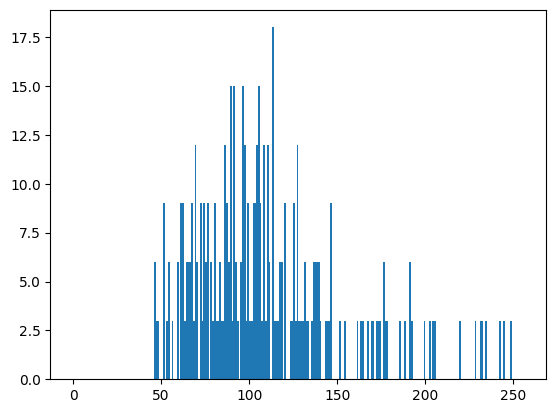

In [9]:
# Exibir histograma
plt.hist(histogram, bins=256, range=(0, 256))
plt.show()

In [10]:
# Aplicar threshold
threshold_value = 128
thresholded_img = cropped_img.point(lambda p: p > threshold_value and 255)
thresholded_img.save('thresholded_image.png')